# Amazon Product Sentiment Analysis

Project: Amazon product recommender system   
Team: The Mean Squares  

This notebook gives a descripton of    
a. Performing the sentiment analysis using the following techniques: Logistic regression, Logistic regression with TFIDF vectorizer and Logistic regression with TFIDF vectorizer and n-grams techniques
b. Analysing the accuracy of the models and determining the best approach    
c. Identifying the highest-used words in each set of reviews, when grouped by rating

     
## Importing the libraries     
    
First step is to import all the libraries required

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
#from wordcloud import WordCloud
from fractions import Fraction
import re

## Reading the data

Now, we are reading the reviews_merged.json file into dataframe and adding new columns to perform the efficiency of helpfulness metrics     


In [4]:
#Read the file and add new columns helpfulnessnumerator and helpfulnessdenominator
reviews = pd.read_json('C:/Users/Dhruv/Desktop/Semester3/PROJECT 2018/Recommendation system/Data/Beauty5.json',lines=True)

reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400


In [3]:
#print(reviews.helpful.values.tolist())
reviews[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(reviews.helpful.values.tolist(), index = reviews.index)
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000,1,2
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200,1,3
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600,0,0
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400,0,0


## Data preprocessing 

We remove the duplicates if any, based on the reviewerID, productID (asin) and unix timestamp. Adding the upvote metrics to analyze the dataset    
     

In [4]:
#Cleaning the data by eliminating duplicates
reviews.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
reviews['Helpful %'] = np.where(reviews['HelpfulnessDenominator'] > 0, reviews['HelpfulnessNumerator'] / reviews['HelpfulnessDenominator'], -1)
reviews['% Upvote'] = pd.cut(reviews['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews['Id'] = reviews.index;
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4,0.750000,60-80%,0
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1,1.000000,80-100%,1
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1,0.000000,Empty,2
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2,1.000000,80-100%,3
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0,-1.000000,Empty,4
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000,1,2,0.500000,40-60%,5
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200,1,3,0.333333,20-40%,6
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1,0.000000,Empty,7
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600,0,0,-1.000000,Empty,8
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400,0,0,-1.000000,Empty,9


In [5]:
df_s = reviews.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_s

Id
overall % Upvote        
1       Empty      11331
        0-20%        348
        20-40%       976
        40-60%      2285
        60-80%      2121
        80-100%     4654
2       Empty      16987
        0-20%        120
        20-40%       589
        40-60%      2032
        60-80%      1719
        80-100%     5468
3       Empty      36027
        0-20%        113
        20-40%       662
        40-60%      2926
        60-80%      2596
        80-100%    10345
4       Empty      69781
        0-20%         47
        20-40%       510
        40-60%      3904
        60-80%      3519
        80-100%    20327
5       Empty     194600
        0-20%         89
        20-40%      1008
        40-60%      9277
        60-80%     10338
        80-100%    62435

In [6]:
df_s = df_s.unstack()
print(df_s)
df_s.columns = df_s.columns.get_level_values(1)
df_s

              Id                                   
% Upvote   Empty 0-20% 20-40% 40-60% 60-80% 80-100%
overall                                            
1          11331   348    976   2285   2121    4654
2          16987   120    589   2032   1719    5468
3          36027   113    662   2926   2596   10345
4          69781    47    510   3904   3519   20327
5         194600    89   1008   9277  10338   62435


% Upvote,Empty,0-20%,20-40%,40-60%,60-80%,80-100%
overall,,,,,,
1,11331,348,976,2285,2121,4654
2,16987,120,589,2032,1719,5468
3,36027,113,662,2926,2596,10345
4,69781,47,510,3904,3519,20327
5,194600,89,1008,9277,10338,62435


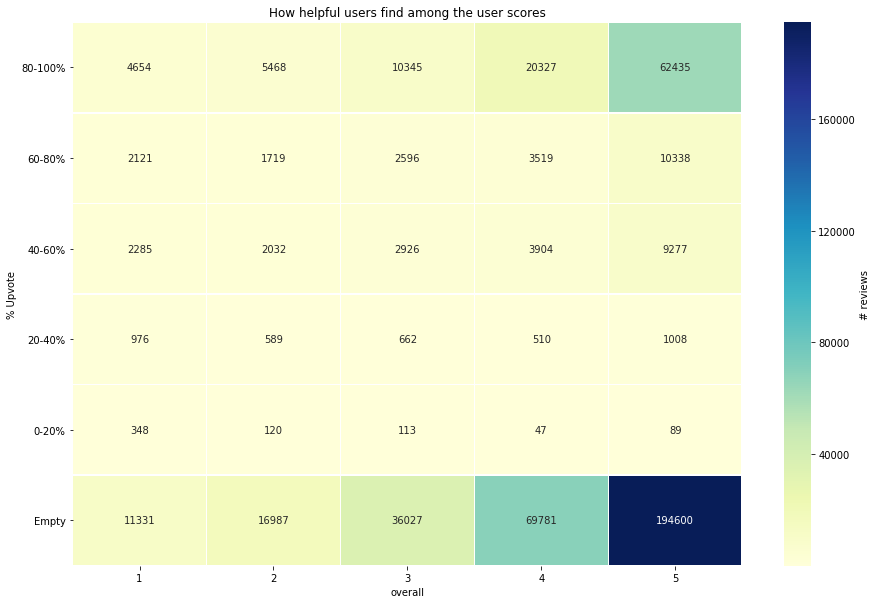

In [7]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among the user scores')
plt.show()


Removing the rating of 3, and convert the reviews into binary, 1- positive, 0- negative


In [8]:
df =  reviews[reviews['overall'] != 3]
X = df['reviewText']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['overall'].map(y_dict)

Performing logistic regression on word count:

In [9]:
c = CountVectorizer(stop_words = 'english')
def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    #print(X_c)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    
    
    
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 115341
# train records: 318349
# test records: 106117


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9336015906970608

-Top 20 positive-
Coefficient          Word
   2.514487    pleasantly
   2.511467         voila
   2.246830         habit
   2.217374         saves
   2.117155   compliments
   2.065657      exceeded
   2.054191       softest
   2.030748     subscribe
   1.996179        intent
   1.898195          bzzz
   1.870532   reservation
   1.869137           190
   1.849712   transformed
   1.847262         comet
   1.828455         loves
   1.815067         evens
   1.811669        highly
   1.807104  apprehensive
   1.806647     skeptical
   1.790003     thickener

-Top 20 negative-
Coefficient            Word
  -2.096634         defeats
  -2.100349             dud
  -2.107515           waste
  -2.163301          poorly
  -2.175223    unflattering
  -2.225197        goodwill
  -2.262578             o_o
  -2.271407            poor
  -2.271899      downgraded
  -2.413096         useless
  -2.413205           shame
  -2.415963            tugs
  -2.423811      

It can be observed that the words with highest positive and negative coefficient don't make sense (such as 190 and 0_0), even if the accuracy is high. Baseline accuracy of the model is as follows:

In [10]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 115341
# train records: 318349
# test records: 106117
Model Accuracy: 0.7959516382860428


TF-IDF vectorizer is added to logistic regression to improve the model accuracy

In [11]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 115341
# train records: 318349
# test records: 106117


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9362401877173309

-Top 20 positive-
Coefficient         Word
  12.899516         love
  11.277600        great
  10.669176      perfect
   8.762816       highly
   8.342813      amazing
   7.688655  compliments
   7.545495  comfortable
   7.479589        loves
   7.398621      pleased
   7.257267    excellent
   7.097425         best
   7.064072         nice
   6.860546         glad
   6.563511      awesome
   6.450934    perfectly
   6.187687         easy
   6.115285        helps
   5.885607        works
   5.713557       little
   5.602423        happy

-Top 20 negative-
Coefficient            Word
  -4.986095            didn
  -5.004751           hopes
  -5.080253         cheaply
  -5.201107   uncomfortable
  -5.706151           awful
  -5.841930       returning
  -5.908704          poorly
  -5.995712           broke
  -5.996496           shame
  -6.031902           worse
  -6.106043        terrible
  -6.260658        horrible
  -6.798162         useless
  -7.10748

Accuracy with tfidf has increased from 79.5 to 93.6. Logistic regression is now performed on TFIDF + n-grams. It can also be observed that words that don't indicate polarity of the sentiment are removed.

In [12]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 3811116
# train records: 318349
# test records: 106117


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9354957264151832

-Top 20 positive-
Coefficient         Word
  20.295047         love
  17.803892        great
  15.337524      perfect
  11.945531  comfortable
  11.638212         nice
  10.169567      amazing
  10.005313         best
   9.855774        loves
   9.227797      pleased
   9.115237        works
   8.772317    excellent
   8.763230         easy
   8.693539       little
   8.472416  compliments
   8.234148        happy
   8.040423      awesome
   7.832617    beautiful
   7.803314    perfectly
   7.796876       highly
   7.769522         glad

-Top 20 negative-
Coefficient            Word
  -7.297728           maybe
  -7.339008            didn
  -7.363916         cheaply
  -7.604627         useless
  -7.822723           awful
  -7.914531           worse
  -8.196063  disappointment
  -8.203952   uncomfortable
  -8.455044           cheap
  -8.605425        terrible
  -8.736014           worst
  -9.021598        horrible
  -9.149430       returning
  -9.32049

It can be observed that accuracy of LR increased with n-grams to 98.6

# Upvote prediction

Analysing the pattern of downvotes by users to predict upvotes of the products

In [13]:
df = df[df['overall'] == 5]
df = df[df['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
df.shape
print(df)
X = df['reviewText']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = df['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

              asin   helpful  overall  \
19      9788072216  [24, 24]        5   
21      9788072216    [1, 1]        5   
24      9790790961    [1, 1]        5   
37      B00004TMFE    [2, 3]        5   
46      B00004TMFE    [7, 8]        5   
59      B00004TUBL    [4, 4]        5   
70      B00004TUBL  [17, 20]        5   
71      B00004TUBL    [1, 1]        5   
85      B00004U9UY    [1, 1]        5   
92      B00004U9UY    [1, 1]        5   
96      B00004U9UY    [1, 1]        5   
111     B000050B6U    [1, 1]        5   
112     B000050B6U    [1, 1]        5   
113     B000050B6U    [1, 1]        5   
115     B000050B6U    [1, 1]        5   
116     B000050B6U    [1, 1]        5   
117     B000050B6U  [75, 78]        5   
118     B000050B6U    [1, 1]        5   
125     B000050B6U    [1, 1]        5   
146     B000050B6U    [2, 2]        5   
147     B000050B6U    [1, 1]        5   
150     B000050B6U    [1, 1]        5   
151     B000050B6U    [1, 1]        5   
159     B000052W

It can be observed that the upvotes are skewed towards positive side. To avoid it, resampling the data has to be performed. 

In [14]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.loc[under_sample_indices, :]
X_u = under_sample_data['reviewText']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  2194


Now, the similar operations as above are performed on the resampled data to measure accuracy of the model

In [15]:
c = CountVectorizer(stop_words = 'english')
text_fit(X_u, y_u, c, LogisticRegression())

# features: 10972
# train records: 1645
# test records: 549
Model Accuracy: 0.5737704918032787

-Top 20 positive-
Coefficient         Word
   1.159755        keeps
   1.109092         ones
   1.047389      regular
   1.047217     dandruff
   0.923873  comfortable
   0.873545  moisturizer
   0.867421         took
   0.866526          fit
   0.835824      anytime
   0.833846   incredibly
   0.827560        scarf
   0.820655       months
   0.808073         room
   0.806121         knee
   0.795487    brightens
   0.789527      pleased
   0.780460     expected
   0.765509       shirts
   0.756570         warm
   0.755616      healthy

-Top 20 negative-
Coefficient       Word
  -0.758031    tanning
  -0.758266     regret
  -0.766981       dove
  -0.775356       plan
  -0.777980      takes
  -0.783330      asked
  -0.817869     person
  -0.818170  selection
  -0.820639        box
  -0.834393   pleasant
  -0.862053     silver
  -0.866994       oily
  -0.916092       avon
  -0.945617    start

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


57.7% is the accuracy of the model. Now, the same is performed with n-grams and tf-idf vectorizer

In [16]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 84430
# train records: 1645
# test records: 549
Model Accuracy: 0.6320582877959927


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



-Top 20 positive-
Coefficient         Word
   1.692930  comfortable
   1.661728          fit
   1.022162        brush
   0.975645       colors
   0.975431         size
   0.973020          bra
   0.800269         wear
   0.727259           34
   0.722781         ones
   0.648218     expected
   0.626775     earrings
   0.626418        cream
   0.617095       shirts
   0.591820        small
   0.590925        price
   0.578809         warm
   0.570085         easy
   0.567270         look
   0.559874         pair
   0.550439        serum

-Top 20 negative-
Coefficient         Word
  -0.649036      tanning
  -0.666844          que
  -0.676215          dry
  -0.682307          red
  -0.694635         item
  -0.698094     products
  -0.724303         time
  -0.726550  conditioner
  -0.731277           la
  -0.775269    love love
  -0.778053         oily
  -0.798365      results
  -0.799645         used
  -0.810772        using
  -0.841491          oil
  -0.860329      shampoo
  -0.892482 

The accuracy has improved to 61.56, but still has some words which don't indicate polarity in the top 10/20.

# Effect of non-contextual features


In [17]:
#pd.set_option('display.max_colwidth', -1)
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['reviewText'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['reviewText'].iloc[:100:20])

Downvote score 5 comments examples:
355      I have shoulder length thick hair, but the end...
7025     No, I don't use this stuff, but my wife and ma...
12280    I use these all the time - usually twice a wee...
14883    You can put away all of your Dove bars now--be...
15741    im very ashamed to say but ,i went a few days ...
Name: reviewText, dtype: object
Upvote score 5 comments examples
204561    I have another pair of this style in a differe...
352978    These shoes are perfect for me; bought my firs...
79853     I got these within 2 days of ordering. The shi...
99203     I've always had pink cheeks, but in the last y...
31414     I've had my hair a multitude of different colo...
Name: reviewText, dtype: object


Above are the samples of the reviews that received downvotes and upvotes. The possible features have to be extracted from these reviews.

In [18]:
under_sample_data['word_count'] = under_sample_data['reviewText'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}))

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'reviewText'])]
y_num = under_sample_data['% Upvote']

          capital_count  word_count  question_mark  punctuation  \
% Upvote                                                          
0             22.326345  100.304467       0.089335    16.536007   
1             13.743847   91.464904       0.094804    15.668186   

          exclamation_mark  
% Upvote                    
0                 1.078396  
1                 1.066545  


# Training the model to predict

The model is now trained to predict upvotes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.4936247723132969


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy: 0.5245901639344263


Accuracy is lower than the count feature and so, it can be determined that these non-contextual features are not the right choice to perform the prediction

# Study of user behavior

The user behavior has to be analyzed to improve the model performance and understand the underlying reasons for the bad or good reviews. This also gives importance to word choices of a user when giving the reviews.

In [20]:
df_user = reviews.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
reviewerID                               
A2V5R832QCSOMX           265     4.362264
ALNFHVS3SC4FV            204     4.034314
AKMEY1BSHSDG7            201     4.592040
A34BZM6S9L7QI4           190     4.457895
AENH50GW3OKDA            168     4.619048
A1UQBFCERIP7VJ           165     4.709091
ALQGOMOY1F5X9            160     2.293750
A3KEZLJ59C1JVH           154     3.662338
A3NHUQ33CFH3VM           153     4.496732
A2J4XMWKR8PPD0           146     5.000000


Count of ratings is considered to select the user and user with the id ALQGOMOY1F5X9 is randomly chosen

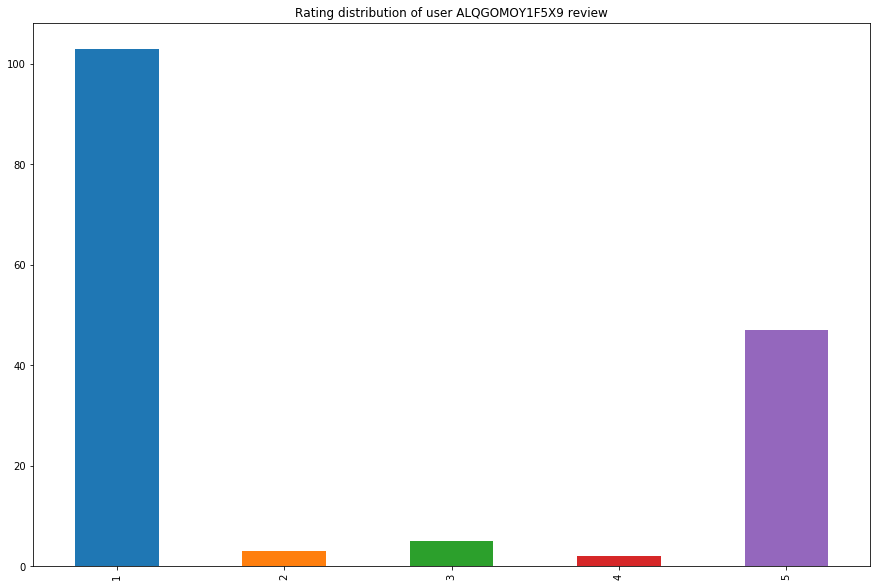

In [21]:
def plot_user(reviewerID):
    df_1user = reviews[reviews['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Rating distribution of user {} review'.format(reviews[reviews['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

plot_user('ALQGOMOY1F5X9')

It can be observed that the user is skeptical of most of the products and hence, reviews are biased towards negative

In [22]:
print(df_user[(df_user['Rating mean']<3.5) & (df_user['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A1RRMZKOMZ2M7J           125     3.272000
A2P739KOM4U5JB           117     3.487179
ARYSDAZNRXN6G            115     3.495652
A2LW5AL0KQ9P1M           107     3.261682
APYKGTU0LFICH             82     2.865854


Now, one of the users with mean rating near 3 (A1RRMZKOMZ2M7J) is chosen to perform the analysis

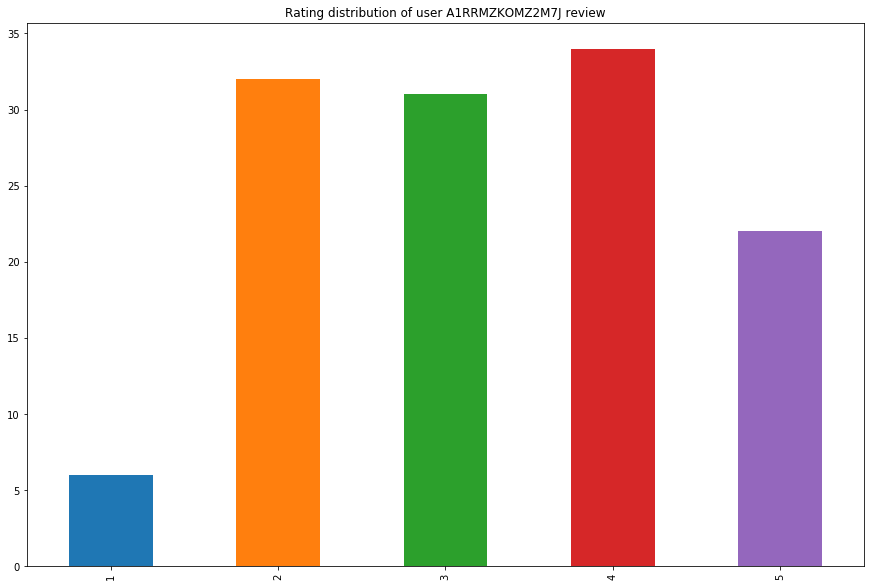

In [23]:
plot_user('A1RRMZKOMZ2M7J')

Most popular words used by the user for different ratings are observed. (2-grams and 3-grams are chosen for analysis)

In [24]:
def get_token_ngram(score, benchmark, userid='all'):

    if userid != 'all':
        df = reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df = reviews[reviews['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2P739KOM4U5JB')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    #test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
     Count Occur %                                      Phrase
0      4.0  57.14%                            (keratin, treat)
1      4.0  57.14%                                (long, term)
2      4.0  57.14%                                (long, hair)
3      4.0  57.14%                                 (use, time)
4      3.0  42.86%                                (hair, feel)
5      2.0  28.57%                        (like, people, long)
6      2.0  28.57%                      (n't, feel, immediate)
7      2.0  28.57%                               (avoid, long)
8      2.0  28.57%                               (care, great)
9      2.0  28.57%                  (conditioner, claim, make)
10     2.0  28.57%                           (past, bra, line)
11     2.0  28.57%                        (conditioner, claim)
12     2.0  28.57%                             (term, benefit)
13     2.0  28.57%                                (hair, care)
14     2.

Now, the popular words for all users are observed

In [25]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %              Phrase
0  1538.0   7.08%        (look, like)
1  1494.0   6.88%      (waste, money)
2   958.0   4.41%         (n't, even)
3   790.0   3.64%        (could, n't)
4   781.0    3.6%        (would, n't)
5   678.0   3.12%        (send, back)
6   675.0   3.11%         (n't, know)
7   659.0   3.03%  (would, recommend)
8   655.0   3.02%        (feel, like)
score 2 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  1669.0    6.2%    (look, like)
1  1127.0   4.19%    (would, n't)
2  1027.0   3.82%     (n't, like)
3   898.0   3.34%    (feel, like)
4   884.0   3.28%  (think, would)
5   852.0   3.17%     (n't, work)
score 3 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  2406.0   4.57%    (look, like)
1  1943.0   3.69%    (would, n't)
2  1771.0   3.36%  (think, would)
3  1655.0   3.14%    (feel, like)
score 4 reviews most popular 2-gram / 3-gram:
    Count Occur %           

Now, only the adjectives are taken into consideration, as those express opinion and nouns don't.

In [26]:
def get_token_adj(score, benchmark, userid='all'):
    
    if userid != 'all':
        df = reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df = reviews[reviews['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [27]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25, 'A2P739KOM4U5JB')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular adjectives word:
    Count  Occur %       Phrase
0     8.0  114.29%         hair
2     6.0   85.71%         good
1     6.0   85.71%          dry
3     4.0   57.14%         long
4     3.0   42.86%    immediate
5     3.0   42.86%       sticky
6     3.0   42.86%        great
12    2.0   28.57%  disclaimer-
15    2.0   28.57%        short
14    2.0   28.57%      shampoo
13    2.0   28.57%          big
8     2.0   28.57%         fine
11    2.0   28.57%         hard
10    2.0   28.57%       strong
9     2.0   28.57%        silky
7     2.0   28.57%      several
16    2.0   28.57%          hot
score 2 reviews most popular adjectives word:
   Count Occur %   Phrase
0   18.0  78.26%    great
1   14.0  60.87%     hair
2   14.0  60.87%     good
3   10.0  43.48%      dry
4    8.0  34.78%   little
5    6.0  26.09%  several
6    6.0  26.09%     soft
7    6.0  26.09%     flat
score 3 reviews most popular adjectives word:
   Count Occur %  Phrase
0   15.0   75.0%     dry
1 

Sentiment analysis is performed using logistic regression and support vector machines. The usage of non-contextual features in reviews is observed. Also, the user behavior is analyzed and the popular words used by the users are determined. 